In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from linearmodels import PanelOLS
from linearmodels.panel import compare
from linearmodels import PooledOLS

### Q1

In [4]:
data = pd.read_csv("icp_indiv_2_dg2011_rep_nomiss.csv")
data.head()

,county,countycode,statecode,year,deaths,population,cruderate,tday_lt10,tday_10_20,tday_20_30,...,prec_25_30,prec_30_35,prec_35_40,prec_40_45,prec_45_50,prec_50_55,prec_55_60,prec_gt60,division,ssyy
0,"Autauga County, AL",1001,1,1968,133,1685,7893.1753,0.00000,0.004261,2.746580,...,0,0,0,1,0,0,0,0,6,11968
1,"Autauga County, AL",1001,1,1969,111,1794,6187.2910,0.00000,0.021464,1.274367,...,0,0,0,0,0,1,0,0,6,11969
2,"Autauga County, AL",1001,1,1970,116,1892,6131.0781,0.00564,1.568161,7.413882,...,0,0,0,0,0,1,0,0,6,11970
3,"Autauga County, AL",1001,1,1971,125,2066,6050.3389,0.00000,0.051751,4.127390,...,0,0,0,0,0,0,0,1,6,11971
4,"Autauga County, AL",1001,1,1972,128,2219,5768.3643,0.00000,0.173654,1.832632,...,0,0,0,0,0,0,1,0,6,11972


In [48]:
# average the counts
data_his = data[["tday_lt10", "tday_10_20", "tday_20_30", "tday_30_40", "tday_40_50", "tday_50_60", "tday_60_70", "tday_70_80", "tday_80_90", "tday_gt90"]].mean().to_frame().reset_index()
# standardize the label
data_his["index"] = data_his["index"].apply(lambda x: x.split("_", 1)[1])
data_his

,index,0
0,lt10,6.611324
1,10_20,10.249158
2,20_30,22.917685
3,30_40,43.333070
4,40_50,54.896988
5,50_60,60.120980
6,60_70,68.224371
7,70_80,70.061190
8,80_90,28.066765
9,gt90,0.518468


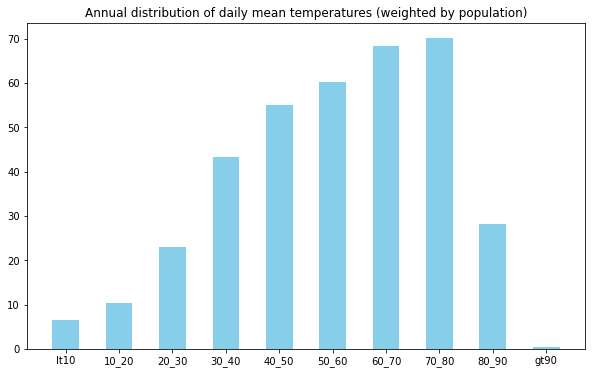

In [47]:
# plotting
plt.figure(figsize=(10, 6))
plt.bar(data_his["index"], data_his[0], width=0.5, color="skyblue")
plt.title('Annual distribution of daily mean temperatures (weighted by population)')
plt.show()

In [79]:
data_1c = data.groupby(["countycode", "county"])[["tday_gt90"]].mean().sort_values(by=["tday_gt90"], ascending=False).reset_index()
data_1c.head()

,countycode,county,tday_gt90
0,4027,"Yuma County, AZ",67.043594
1,4013,"Maricopa County, AZ",57.504620
2,6025,"Imperial County, CA",55.315463
3,4021,"Pinal County, AZ",42.219994
4,32003,"Clark County, NV",38.145456


In [78]:
print("Number of counties experienced zero days above 90◦F per year: " + str(len(data_1c[data_1c["tday_gt90"] == 0])))
      

Number of counties experienced zero days above 90◦F per year: 115


### Q2

In [82]:
data[["cruderate"]].mean().to_frame().reset_index()

,index,0
0,cruderate,5365.066787


In [84]:
data[["deaths"]].sum()

deaths    50830306
dtype: int64

### Q3

In [90]:
# load the temperature data
temp = pd.read_csv("icp_indiv_2_county_avetemp.csv")

In [122]:
# create columns as required
data_annual = data.groupby(["countycode"]).mean()[["cruderate", "tday_lt10", "tday_10_20", "tday_20_30", "tday_30_40", "tday_40_50", "tday_50_60", "tday_60_70", "tday_70_80", "tday_80_90", "tday_gt90"]].reset_index()
data_annual["hotdays"] = data_annual["tday_70_80"] + data_annual["tday_80_90"] + data_annual["tday_gt90"]
data_annual["hotterdays"] = data_annual["tday_80_90"] + data_annual["tday_gt90"]

# merging with temperature
data_annual = data_annual.merge(temp, on=["countycode"], how="inner")
# sorting
data_annual = data_annual.sort_values(["normal_1981_2010"], ascending=True)

In [143]:
data_annual.head()

,countycode,cruderate,tday_lt10,tday_10_20,tday_20_30,tday_30_40,tday_40_50,tday_50_60,tday_60_70,tday_70_80,tday_80_90,tday_gt90,hotdays,hotterdays,county,state,normal_1981_2010
235,8051,5048.477474,3.839211,14.332298,39.627676,65.739856,62.232193,59.612562,67.361884,47.607319,4.647003,0.0,52.254321,4.647003,Gunnison County,CO,0.950000
239,8065,4958.671077,5.269032,14.515567,38.103297,63.901623,66.326296,60.744120,67.685200,45.003289,3.451577,0.0,48.454866,3.451577,Lake County,CO,1.183334
2688,50015,5438.646217,25.704025,31.687051,44.187293,58.233190,52.868751,60.150270,64.604711,26.575127,0.989581,0.0,27.564708,0.989581,Lamoille County,VT,1.644444
2686,50011,5838.586071,23.830115,29.382646,42.233631,57.118401,52.608741,59.243153,67.577480,31.583007,1.422826,0.0,33.005833,1.422826,Franklin County,VT,1.644444
251,8093,3611.875091,5.430640,14.359809,37.864468,64.419878,69.104213,62.316340,68.166279,41.037678,2.300697,0.0,43.338374,2.300697,Park County,CO,1.850001


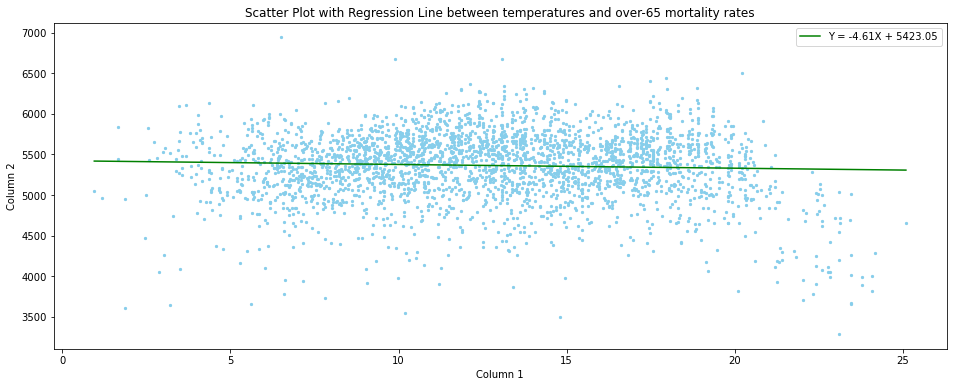

In [142]:
# Perform linear regression
x = data_annual["normal_1981_2010"]
y = data_annual["cruderate"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create a scatter plot
plt.figure(figsize=(16, 6))
plt.scatter(x, y, color='skyblue', s=5)

# Create the regression line
line = slope * x + intercept
plt.plot(x, line, color='green', label=f'Y = {slope:.2f}X + {intercept:.2f}')

# Adding labels and title
plt.xlabel('county average temperatures')
plt.ylabel('Column over-65 mortality rates')
plt.title('Scatter Plot with Regression Line between temperatures and over-65 mortality rates')
plt.legend()

# Show the plot
plt.show()

In [146]:
p_value

1.6125000263427022e-08

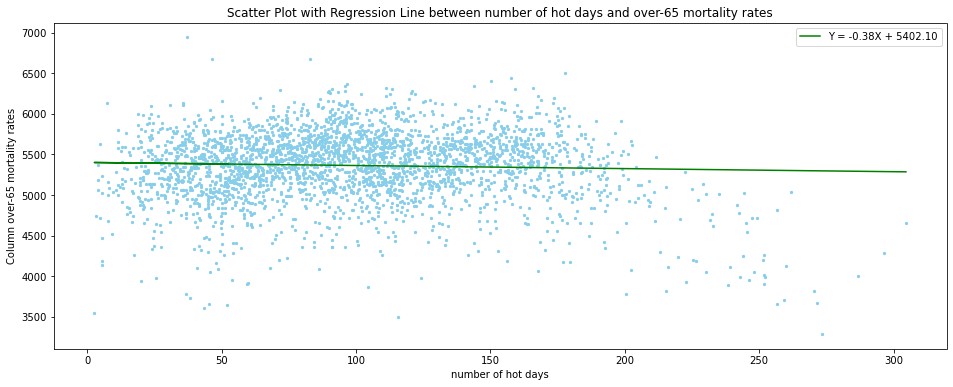

In [147]:
# Hot days
x = data_annual["hotdays"]
y = data_annual["cruderate"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create a scatter plot
plt.figure(figsize=(16, 6))
plt.scatter(x, y, color='skyblue', s=5)

# Create the regression line
line = slope * x + intercept
plt.plot(x, line, color='green', label=f'Y = {slope:.2f}X + {intercept:.2f}')

# Adding labels and title
plt.xlabel('number of hot days')
plt.ylabel('Column over-65 mortality rates')
plt.title('Scatter Plot with Regression Line between number of hot days and over-65 mortality rates')
plt.legend()

# Show the plot
plt.show()

In [148]:
p_value

0.014927549108149142

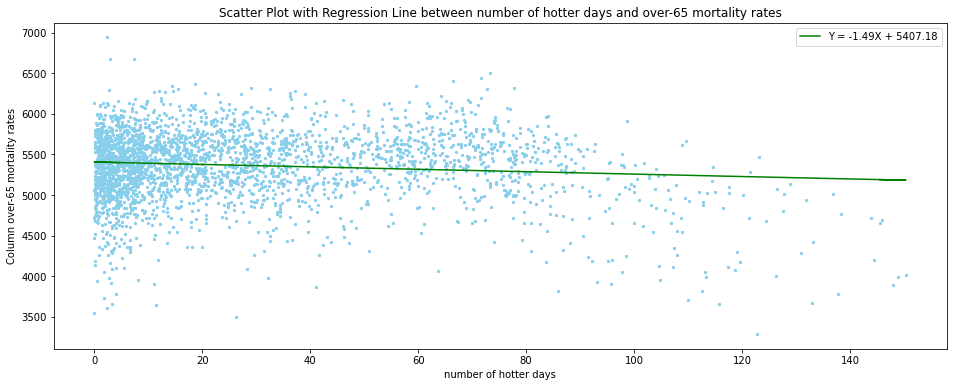

In [149]:
# Hotter days
x = data_annual["hotterdays"]
y = data_annual["cruderate"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create a scatter plot
plt.figure(figsize=(16, 6))
plt.scatter(x, y, color='skyblue', s=5)

# Create the regression line
line = slope * x + intercept
plt.plot(x, line, color='green', label=f'Y = {slope:.2f}X + {intercept:.2f}')

# Adding labels and title
plt.xlabel('number of hotter days')
plt.ylabel('Column over-65 mortality rates')
plt.title('Scatter Plot with Regression Line between number of hotter days and over-65 mortality rates')
plt.legend()

# Show the plot
plt.show()

In [150]:
p_value

1.6125000263427022e-08

### Q4

In [165]:
data_4 = data[(data["county"] == "Mobile County, AL") | (data["county"] == "Cook County, IL") |  (data["county"] == "Los Angeles County, CA") |  (data["county"] == "Miami-Dade County, FL")]
data_4["hotdays"] = data_4["tday_70_80"] + data_4["tday_80_90"] + data_4["tday_gt90"]
data_4["hotterdays"] = data_4["tday_80_90"] + data_4["tday_gt90"]

/var/folders/wp/6_zz4vgs79ndjls9bw_j54s80000gn/T/ipykernel_80337/2649512727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4["hotdays"] = data_4["tday_70_80"] + data_4["tday_80_90"] + data_4["tday_gt90"]
/var/folders/wp/6_zz4vgs79ndjls9bw_j54s80000gn/T/ipykernel_80337/2649512727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4["hotterdays"] = data_4["tday_80_90"] + data_4["tday_gt90"]


In [167]:
data_4.head()

,county,countycode,statecode,year,deaths,population,cruderate,tday_lt10,tday_10_20,tday_20_30,...,prec_35_40,prec_40_45,prec_45_50,prec_50_55,prec_55_60,prec_gt60,division,ssyy,hotdays,hotterdays
1680,"Mobile County, AL",1097,1,1968,1431,23301,6141.3672,0.0,0.000000,0.123163,...,0,1,0,0,0,0,6,11968,184.794243,87.389725
1681,"Mobile County, AL",1097,1,1969,1404,24002,5849.5127,0.0,0.000000,0.094075,...,0,0,0,0,0,1,6,11969,171.881291,77.570713
1682,"Mobile County, AL",1097,1,1970,1472,24688,5962.4106,0.0,0.009786,3.186427,...,0,0,0,0,0,1,6,11970,183.098564,96.772377
1683,"Mobile County, AL",1097,1,1971,1496,25800,5798.4497,0.0,0.000000,0.375354,...,0,0,0,0,1,0,6,11971,193.706551,89.713875
1684,"Mobile County, AL",1097,1,1972,1614,26805,6021.2646,0.0,0.000000,0.265539,...,0,0,0,1,0,0,6,11972,192.921013,92.070457


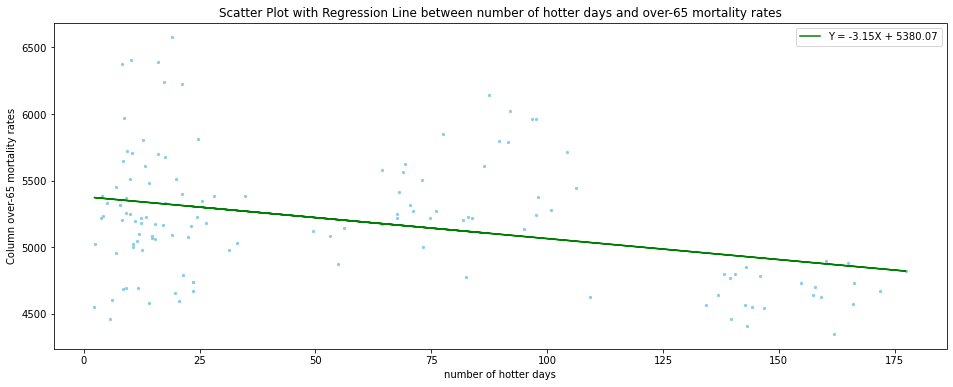

In [169]:
# Hotter days
x = data_4["hotterdays"]
y = data_4["cruderate"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create a scatter plot
plt.figure(figsize=(16, 6))
plt.scatter(x, y, color='skyblue', s=5)

# Create the regression line
line = slope * x + intercept
plt.plot(x, line, color='green', label=f'Y = {slope:.2f}X + {intercept:.2f}')

# Adding labels and title
plt.xlabel('number of hotter days')
plt.ylabel('Column over-65 mortality rates')
plt.title('Scatter Plot with Regression Line between number of hotter days and over-65 mortality rates')
plt.legend()

# Show the plot
plt.show()

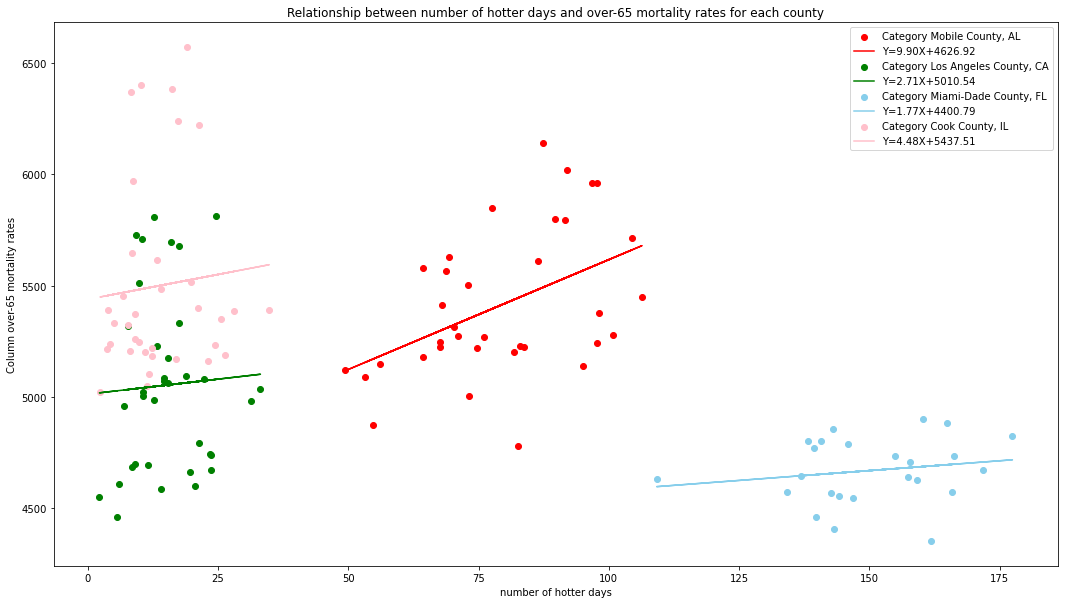

In [180]:
# Unique categories
categories = data_4['county'].unique()

# Set up the plot
plt.figure(figsize=(18, 10))

# Define a list of colors for the categories
colors = ['red', 'green', 'skyblue', "pink"] # Add more colors if you have more categories

# Plotting
for i, category in enumerate(categories):
    # Filter the data for the category
    subset = data_4[data_4['county'] == category]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(subset['hotterdays'], subset['cruderate'])

    # Scatter plot with custom color
    plt.scatter(subset['hotterdays'], subset['cruderate'], color=colors[i], label=f'Category {category}')

    # Regression line with the same color
    line = slope * subset['hotterdays'] + intercept
    plt.plot(subset['hotterdays'], line, color=colors[i], label=f'Y={slope:.2f}X+{intercept:.2f}')

# Adding labels, title, and legend
plt.xlabel('number of hotter days')
plt.ylabel('Column over-65 mortality rates')
plt.title('Relationship between number of hotter days and over-65 mortality rates for each county')
plt.legend()
plt.show()

### Q5

In [13]:
df = data
df = df.set_index(['countycode', 'ssyy'])

# create weight
weights = df['population'] 

# create the model with fixed effects for 'countycode' (entity effects) and 'ssyy' (time effects)
# The 'TimeEffects' argument would control for any fixed effects over time (not shown in the R code provided)

model = PanelOLS.from_formula('cruderate ~ 1 + tday_lt10 + tday_10_20 + tday_20_30 + tday_30_40 + tday_40_50 + tday_50_60 + tday_70_80 + tday_80_90 + tday_gt90 + prec_10_15 + prec_15_20 + prec_20_25 + prec_25_30 + prec_30_35 + prec_35_40 + prec_40_45 + prec_45_50 + prec_50_55 + prec_55_60 + prec_gt60 + EntityEffects', 
                              data=df, 
                              weights=weights)

results = model.fit(cov_type='clustered', cluster_entity=True)

print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:              cruderate   R-squared:                        0.0173
Estimator:                   PanelOLS   R-squared (Between):              0.1833
No. Observations:              104545   R-squared (Within):               0.0173
Date:                Sun, Jan 21 2024   R-squared (Overall):              0.1048
Time:                        14:57:49   Log-likelihood                -7.807e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                    3.67e+05
Entities:                        2987   P-value                           0.0000
Avg Obs:                       35.000   Distribution:               F(20,101538)
Min Obs:                       35.000                                           
Max Obs:                       35.000   F-statistic (robust):             26.714
                            